# MIS 382N: Advanced Machine Learning Assignment 5

**Total points**: 75 pts

**Due**: 11:59 PM CST, Friday, November 21st, 2025.

**Submission**:
1. Submit your **Jupyter Notebook via Canvas**, AND
2. **Save your Jupyter Notebook to a PDF, and submit the PDF via Gradescope**.

You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas and Gradescope. But be sure to include the name and UT EID for both students.

Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

For questions involving mathematical derivations, you can write your answer on paper and then upload an image. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Name(s) and EID(s)**:
Zan Merrill - ahm2452
-------------------------
Academic Disclaimer: ChatGPT used in accordance with class policy

Bookmarks:

Q1. <a href=#Q1>Implementing Logistic Regression</a>

Q2. <a href=#Q2>Ensemble Methods for Classification</a>

Q3. <a href=#Q3>Ensemble Conceptual Questions</a>


-------------------------

**Q1. Logistic Regression** (30 pts) <a name='Q1'/>

In this question, you will implement Logistic Regression from scratch using numpy (not sklearn). You will train the Logistic Regression on a synthetic dataset generated from two Isotropic Gaussians. Then, you will visualize the decision boundary and examine the learned parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple
from sklearn.model_selection import train_test_split

np.random.seed(42)

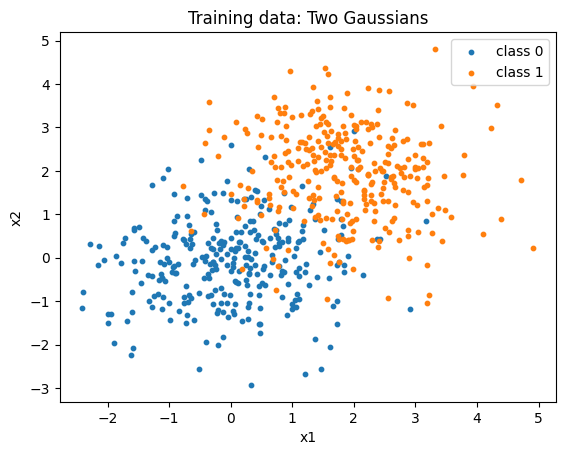

In [2]:
rng = np.random.default_rng(42)
n_per_class = 500
mu0 = np.array([0.0, 0.0])
mu1 = np.array([2.0, 2.0])
Sigma = np.array([[1.0, 0.0],
                  [0.0, 1.0]])

X0 = rng.multivariate_normal(mu0, Sigma, size=n_per_class)
X1 = rng.multivariate_normal(mu1, Sigma, size=n_per_class)
y0 = np.zeros(n_per_class, dtype=int)
y1 = np.ones(n_per_class, dtype=int)

X = np.vstack([X0, X1])          # shape (2*n_per_class, 2)
y = np.concatenate([y0, y1])     # shape (2*n_per_class,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

plt.figure()
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=10, label="class 0")
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=10, label="class 1")
plt.legend()
plt.title("Training data: Two Gaussians")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

**Part 1.** (5 points)

We model the probability of a sample belonging to the positive class $p_{\theta}(y = 1 | \mathbf{x}) = \sigma(z)$ with $z = \mathbf{w}^\top \mathbf{x} + b$ and sigmoid $\sigma(z) = \frac{1}{1 + \exp^{-z}}$ where $\mathbf{x} \in \mathbb{R}^d, \mathbf{w} \in \mathbb{R}^d, b \in \mathbb{R},$ and $z \in \mathbb{R}$. In this exercise, $d=2$.

An efficient way to implement Logistic Regression is to compute probabilities of multiple samples simultaneously. Suppose there are $N$ training samples in total, we denote the label vector by $\mathbf{y} \in \{0,1\}^N$ and the predicted probability vector by $\mathbf{p} \in \mathbb{R}^N$. The $i$'th entries $\mathbf{y}_i$ and $\mathbf{p}_i$ corresponds to the label and predicted probability of the $i$'th sample, respectively. Let the data matrix be

$$\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1^\top \\[4pt]
\mathbf{x}_2^\top \\[4pt]
\vdots \\[4pt]
\mathbf{x}_N^\top
\end{bmatrix} \in \mathbb{R}^{N \times d}$$

, the weight vector $\mathbf{w} \in \mathbb{R}^d$ be same as before, and the bias vector be $$\mathbf{b} = \begin{bmatrix} b \\ \vdots \\ b\end{bmatrix} \in \mathbb{R}^N$$.

Then, $\mathbf{p} = \sigma(\mathbf{X}\mathbf{w} + \mathbf{b}) \in \mathbb{R}^N$ would be the vector of predicted probabilities.



The average logistic loss (negative log-likelihood) is:
$$L = \frac{1}{N} \sum_{i=1}^N [\mathbf{y}_i \log \mathbf{p}_i + (1 - \mathbf{y}_i) \log (1 - \mathbf{p}_i)]$$

with optional L2 loss: $\frac{\lambda}{2N} \|\mathbf{w}\|_2^2$.

Implement the following functions: ```sigmoid```, ```predict_proba```, and ```log_loss```.

**Answer:**

In [3]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    Compute the sigmoid function.
    Args:
        z: Input logits. np.ndarray, shape (N,)
    Returns
        proba: Probabilities after sigmoid transform. np.ndarray, shape (N,)
    """
    # Implement sigmoid function
    ### START CODE ###
    proba = 1 / (1 + np.exp(-z))
    ### END CODE ###
    return proba


def predict_proba(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Predict class probabilities for inputs X.
    Args:
        X: Data matrix. np.ndarray, shape (N, d)
        w: Weights. np.ndarray, shape (d,)
        b: Bias. float
    Returns:
        proba: Probabilities. np.ndarray, shape (N,)
    """
    # Predict class probabilities for inputs X
    ### START CODE ###
    z = X @ w + b          # shape (N,)
    proba = sigmoid(z)     # use the function above
    ### END CODE ###
    return proba


def log_loss(y: np.ndarray, p: np.ndarray, l2_lambda: float = 0.0, w: Optional[np.ndarray] = None) -> float:
    """
    Args:
        y: True labels. np.ndarray, shape (N,)
        p: Predicted probabilities. np.ndarray, shape (N,)
        l2_lambda: L2 regularization strength. float
        w: Weights (for computing L2 regularization loss). np.ndarray, shape (d,)
    Returns:
        loss: Loss value. float
    """
    # Add a small epsilon to avoid log(0)
    eps = 1e-12
    p = np.clip(p, eps, 1 - eps)
    N = y.shape[0]

    # Calculate the log loss
    ### START CODE ###
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    ### END CODE ###

    if l2_lambda > 0 and w is not None:
        # Add L2 regularization if specified
        ### START CODE ###
        loss += (l2_lambda / (2 * N)) * np.sum(w ** 2)
        ### END CODE ###
    return loss


**Part 2.** (5 points)
Given the data matrix $\mathbf{X}$, the weight vector $\mathbf{w}$, the bias $b$, the probability vector $\mathbf{p}$, and the label vector $\mathbf{y}$, the gradient of the loss is:

\begin{align}
\nabla_{\mathbf{w}} L &= \frac{1}{N} \mathbf{X}^\top (\mathbf{p} - \mathbf{y}) + \frac{\lambda}{N} \mathbf{w} \in \mathbb{R}^d \\
\nabla_{b} L &= \frac{1}{N} \sum_{i=1}^N (\mathbf{p}_i - \mathbf{y}_i) \in \mathbb{R}
\end{align}

Please implement the gradient below:

In [4]:
def gradients(
    X: np.ndarray,
    y: np.ndarray,
    w: np.ndarray,
    b: float,
    l2_lambda: float = 0.0
) -> Tuple[np.ndarray, float]:
    """
    Compute gradients of the logistic loss with respect to w and b.
    """
    N = X.shape[0]
    p = predict_proba(X, w, b)

    # Implement gradient of the logistic loss (w/o regularization component) for the weight vector
    ### START CODE ###
    grad_w = (1 / N) * (X.T @ (p - y))
    ### END CODE ###

    if l2_lambda > 0:
        # Add optional L2 regularization loss gradient
        ### START CODE ###
        grad_w += (l2_lambda / N) * w
        ### END CODE ###

    # Implement gradient of the logistic loss for the bias term
    ### START CODE ###
    grad_b = (1 / N) * np.sum(p - y)
    ### END CODE ###

    return grad_w, grad_b


**Part 3.** (5 points) Implement the training function ```train_logreg``` that does full batch gradient descent and track loss per epoch. Then, train a logistic regression model with ```lr=0.25```, ```epochs=300```, ```l2_lambda=0.5``` and visualize the training loss curve.



In [5]:
def train_logreg(X, y, lr=0.1, epochs=300, l2_lambda=0.0):
    N, d = X.shape
    w = np.zeros(d)
    b = 0.0
    loss_history = []

    for e in range(epochs):
        # Get the predicted probabilities
        ### START CODE ###
        p = predict_proba(X, w, b)
        ### END CODE ###

        # Calculate the loss
        ### START CODE ###
        loss = log_loss(y, p, l2_lambda=l2_lambda, w=w)
        ### END CODE ###
        loss_history.append(loss)

        # Calculate the gradients and update the parameters
        ### START CODE ###
        grad_w, grad_b = gradients(X, y, w, b, l2_lambda=l2_lambda)
        w = w - lr * grad_w
        b = b - lr * grad_b
        ### END CODE ###

    return w, b, np.array(loss_history)


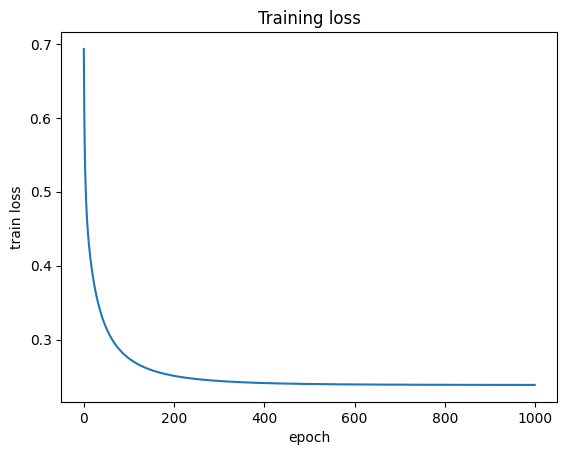

In [6]:
w, b, loss_history = train_logreg(X_train, y_train, lr=0.2, epochs=1000, l2_lambda=0.5)

plt.figure()
plt.plot(loss_history)
plt.xlabel("epoch"); plt.ylabel("train loss")
plt.title("Training loss")
plt.show()

**Part 4.** (5 points) Implement the ```predict_label``` function and evaluate the training and testing accuracies.

In [7]:
def predict_label(X, w, b, threshold=0.5):
    # If the predicted probability >= threshold, predict 1, otherwise predict 0
    ### START CODE ###
    pred = (predict_proba(X, w, b) >= threshold).astype(int)
    ### END CODE ###
    return pred

# Evaluate the training and testing accuracies
y_pred_train = predict_label(X_train, w, b)
y_pred_test = predict_label(X_test, w, b)

train_acc = np.mean(y_pred_train == y_train)
test_acc = np.mean(y_pred_test == y_test)
print(f"Training accuracy: {train_acc:.3f}, Testing accuracy: {test_acc:.3f}")

Training accuracy: 0.908, Testing accuracy: 0.915


Run the following code to visualize the decision boundary and print out the learned Logistic Regression parameters ```w``` and ```b```.

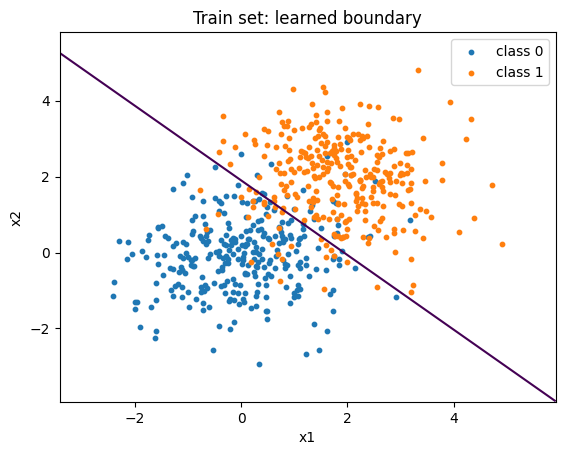

Learned parameters: w = [1.60462934 1.62971376], b = -3.1031295667498595


In [8]:
def plot_boundary(X, y, w, b, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    pp = predict_proba(grid, w, b).reshape(xx.shape)

    plt.figure()
    plt.contour(xx, yy, pp, levels=[0.5])
    plt.scatter(X[y==0, 0], X[y==0, 1], s=10, label="class 0")
    plt.scatter(X[y==1, 0], X[y==1, 1], s=10, label="class 1")
    plt.legend()
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

plot_boundary(X_train, y_train, w, b, title="Train set: learned boundary")
print(f"Learned parameters: w = {w}, b = {b}")

**Part 5.** (5 points) Are the relative relationship between the learned parameters ($\mathbf{w}$ and $b$) what you expected according to the synthetic data generation process (Gaussian parameters)? Why?

**Answer:**

Yes.  In the synthetic dataset, class 1 is "up and right" of class 0.  Therefore increasing both X1 and X2 should be positive to increase the posterior probability that a datapoint belongs to class 1.  

For the bias term, it simply positions the boundary to pass between the two classes.  It has to be negative because the decision boundary is where the input to the sigmoid function = 0, or where the w1x1 + w2x2 + b = 0.  both w1 and w2 are positive and class 1 is up and right, so b must be negative to offset that.

**Part 6a.** (2.5 points) Suppose one decides to reject if the higher posterior probability is less than 0.7 for a given $\mathbf{x}$. **Derive** the reject region in the input space by identifying the two boundaries of this region (provide two inequalities) and then complete the code below to plot the region.

**Answer:**

The posterior probability for Class 1 is

$$
p_\theta(y=1 \mid \mathbf{x}) = \sigma(w_1 x_1 + w_2 x_2 + b), \qquad
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

We reject whenever the model is not at least 70% confident in either class.
This means both conditions must hold:

- \(p < 0.7\)  (not confident in Class 1)
- \(1 - p < 0.7\), which gives \(p > 0.3\)  (not confident in Class 0)

Thus the reject region is:

$$
0.3 \le p_\theta(y=1 \mid \mathbf{x}) \le 0.7.
$$

Using the inverse of the sigmoid (logit function):

$$
z = w_1 x_1 + w_2 x_2 + b = \log\left(\frac{p}{1 - p}\right),
$$

we plug in the two probability thresholds \(p = 0.3\) and \(p = 0.7\) to obtain the decision boundaries:

$$
w_1 x_1 + w_2 x_2 + b = \log\left(\frac{0.3}{0.7}\right),
$$

$$
w_1 x_1 + w_2 x_2 + b = \log\left(\frac{0.7}{0.3}\right).
$$

Therefore, the reject region in input space is:

$$
\log\left(\frac{0.3}{0.7}\right)
\;\le\;
w_1 x_1 + w_2 x_2 + b
\;\le\;
\log\left(\frac{0.7}{0.3}\right).
$$


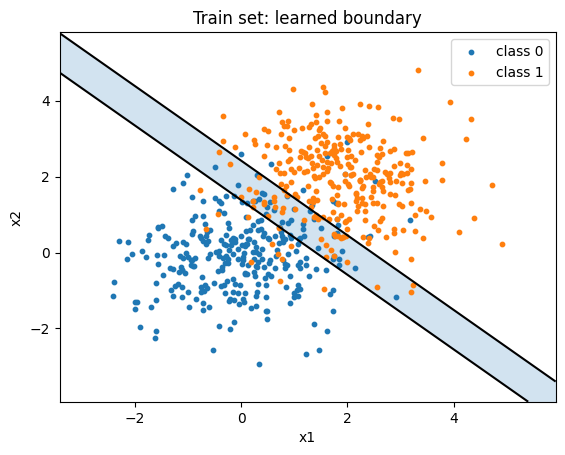

Learned parameters: w = [1.60462934 1.62971376], b = -3.1031295667498595


In [9]:
def plot_rejection_boundaries(X, y, w, b, p1, p2, title="Rejection boundary"):
    """
    The new args p1 and p2 are the probabilities of the rejection boundaries. p1 < p2.
    """
    assert p1 <= p2
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    pp = predict_proba(grid, w, b).reshape(xx.shape)

    plt.figure()
    # Plot the rejection boundaries and the shaded region in between
    ### START CODE ###
    plt.contour(xx, yy, pp, levels=[p1], colors='k')   # lower boundary
    plt.contour(xx, yy, pp, levels=[p2], colors='k')   # upper boundary

    # Shade the reject region between p1 and p2
    plt.contourf(xx, yy, pp, levels=[p1, p2], colors=['tab:blue'], alpha=0.2, zorder=0)
    ### END CODE ###

    plt.scatter(X[y==0, 0], X[y==0, 1], s=10, label="class 0")
    plt.scatter(X[y==1, 0], X[y==1, 1], s=10, label="class 1")
    plt.legend()
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

plot_rejection_boundaries(X_train, y_train, w, b, 0.3, 0.7, title="Train set: learned boundary")
print(f"Learned parameters: w = {w}, b = {b}")

**Part 6b.** (2.5 points) State in plain English the impact of independent variable $x_1$  on a "determination" for Class 1, by properly interpreting its coefficient returned by your logistic regression model.

**Answer:**

Because the coefficient for X1 is positive, increasing X1 increases the model’s posterior probability that the point belongs to Class 1.

**Q2. Ensemble Methods for Classification** (35 pts) <a name='Q2'/>

In this question, we will compare the performances of [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) classifiers.

We will look at the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset for this question. The dataset is extremely large so for this question we will only consider a subset which has been provided along with the notebook for this assignment. The dataset has already been split into train and test sets.

The task is to predict the probability that someone will experience financial distress in the next two years.


In [ ]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [11]:
url = "https://raw.githubusercontent.com/AHMerrill/aml_hw5/main/hw5_data.csv"

In [12]:
data = pd.read_csv(url)
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis=1, inplace=True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [13]:
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (4000, 10) (4000,)
test: (1000, 10) (1000,)


In [15]:
columns_list = list(X.columns)
columns_list

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

**Part 1.** (5 points) Complete the following functions that will be repeatedly used later: ```evaluate_classifier```, ```train_and_evaluate_classifier```, and ```grid_search_for_classifier```. Please implement according to the comments.

In [16]:
def evaluate_classifier(clf, X_eval, y_eval):
    # Perform prediction on X_eval and extract the probability score of the positive class
    ### START CODE ###
    y_pred = clf.predict(X_eval)
    y_pred_proba = clf.predict_proba(X_eval)[:, 1]
    ### END CODE ###

    # Calculate accuracy and AU-ROC score
    ### START CODE ###
    acc_score = accuracy_score(y_eval, y_pred)
    auc_score = roc_auc_score(y_eval, y_pred_proba)
    ### END CODE ###

    return acc_score, auc_score

def train_and_evaluate_classifier(clf, X_train, y_train, X_eval, y_eval):
    # Fit your classifier on the training set
    ### START CODE ###
    clf.fit(X_train, y_train)
    ### END CODE ###

    acc_score, auc_score = evaluate_classifier(clf, X_eval, y_eval)
    return clf, acc_score, auc_score

def grid_search_for_classifier(clf, param_grid, X_train, y_train):
    # Initialize GridSearchCV. Use 5-fold cross validation and AU-ROC as the scoring metric.
    ### START CODE ###
    grid_search = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    )
    ### END CODE ###

    # Perform grid search
    ### START CODE ###
    grid_search.fit(X_train, y_train)
    ### END CODE ###

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_


**Part 2.** (5 points) Fit a Decision Tree Classifier with ```random_state=42``` for this classification problem. Tune the following hyper-parameters: ```max_depth```, ```min_samples_split```, and ```min_samples_leaf```. Report the ```accuracy_score``` and ```roc_auc_score``` on the test set.

In [17]:
# Define your hyper-parameter grid for decision tree classifier
### START CODE ###
hparams_grid_dt = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}
### END CODE ###

clf_dt = DecisionTreeClassifier(random_state=42)

# Perform grid search and get the trained classifier, best hyper-parameters, and best AU-ROC score
### START CODE ###
clf_dt, best_hparams_dt, best_score_dt = grid_search_for_classifier(
    clf_dt, hparams_grid_dt, X_train, y_train
)
### END CODE ###
print(f"Best Hyper-parameters: {best_hparams_dt}, AU-ROC: {best_score_dt:.3f}")

# Evaluate the decision tree classifier on the test set
### START CODE ###
test_acc_dt, test_auc_dt = evaluate_classifier(clf_dt, X_test, y_test)
### END CODE ###
print(f" Decision Tree Test Accuracy: {test_acc_dt:.3f}, Test AU-ROC: {test_auc_dt:.3f}")


Best Hyper-parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}, AU-ROC: 0.801
 Decision Tree Test Accuracy: 0.930, Test AU-ROC: 0.785


**Part 3.** (5 points) Create a [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of 10 classifiers (i.e, n_estimators=10) with ```random_state=42```. Please use Decision Tree Classifier with ```random_state=42``` and the previously found best hyper-parameter combination as the base classifier. Report ```accuracy_score``` and ```roc_auc_score``` on the test data for this emsemble classifier.

In [19]:
# Initialize your bagging classifier
### START CODE ###
clf_bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, **best_hparams_dt),
    n_estimators=10,
    random_state=42
)
### END CODE ###

# Train and evaluate the bagging classifier
### START CODE ###
clf_bag, test_acc_bag, test_auc_bag = train_and_evaluate_classifier(
    clf_bag, X_train, y_train, X_test, y_test
)
### END CODE ###
print(f"Bagging of Decision Trees Test Accuracy: {test_acc_bag:.3f}, Test AU-ROC: {test_auc_bag:.3f}")


Bagging of Decision Trees Test Accuracy: 0.928, Test AU-ROC: 0.811


**Part 4.** (5 points) In this question, you will fit a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model on the training data for this classification task.

1. First, please set ```random_state=42```, find the best hyper-parameters, and refit your classifier with those hyper-parameters. Consider tuning the following hyper-parameters: ```n_estimators```, ```max_depth```, ```min_samples_leaf```, and ```bootstrap```.
2. Second, evaluate your fitted random forest classifier on the test set. Report the accuracy and AU-ROC.

In [20]:
# Define your hyper-parameter grid for random forest classifier
### START CODE ###
hparams_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
### END CODE ###

# Initialize your random forest classifier
### START CODE ###
clf_rf = RandomForestClassifier(random_state=42)
### END CODE ###

# Perform grid search and get the trained classifier, best hyper-parameters, and best AU-ROC score
### START CODE ###
clf_rf, best_hparams_rf, best_score_rf = grid_search_for_classifier(
    clf_rf, hparams_grid_rf, X_train, y_train
)
### END CODE ###
print(f"Best Hyper-parameters: {best_hparams_rf}, AU-ROC: {best_score_rf:.3f}")

# Evaluate the random forest classifier on the test set
### START CODE ###
test_acc_rf, test_auc_rf = evaluate_classifier(clf_rf, X_test, y_test)
### END CODE ###
print(f"Random Forest Test Accuracy: {test_acc_rf:.3f}, Test AU-ROC: {test_auc_rf:.3f}")


Best Hyper-parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}, AU-ROC: 0.853
Random Forest Test Accuracy: 0.935, Test AU-ROC: 0.820


**Part 5.** (10 points) This time, let us use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) for the same task. For AdaBoost and XGBoost, please set ```random_state=42``` and find the best hyper-parameters such as ```n_estimators```, ```learning_rate```, ```max_depth```. Refit your model using the best hyper-parameters, and report the ```accuracy_score``` and ```roc_auc_score``` on test data.

In [21]:
# Define your hyper-parameter grid for AdaBoost classifier
### START CODE ###
hparams_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
### END CODE ###

# Initialize your AdaBoost classifier
### START CODE ###
clf_ab = AdaBoostClassifier(random_state=42)
### END CODE ###

# Perform grid search and get the trained classifier, best hyper-parameters, and best AU-ROC score
### START CODE ###
clf_ab, best_hparams_ab, best_score_ab = grid_search_for_classifier(
    clf_ab, hparams_grid_ab, X_train, y_train
)
### END CODE ###
print(f"Best Hyper-parameters: {best_hparams_ab}, AU-ROC: {best_score_ab:.3f}")

# Evaluate the AdaBoost classifier on the test set
### START CODE ###
test_acc_ab, test_auc_ab = evaluate_classifier(clf_ab, X_test, y_test)
### END CODE ###
print(f" AdaBoost Test Accuracy: {test_acc_ab:.3f}, Test AU-ROC: {test_auc_ab:.3f}")


Best Hyper-parameters: {'learning_rate': 0.1, 'n_estimators': 100}, AU-ROC: 0.836
 AdaBoost Test Accuracy: 0.936, Test AU-ROC: 0.833


In [22]:
from xgboost import XGBClassifier

# Define your hyper-parameter grid for XGBoost classifier
### START CODE ###
hparams_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
### END CODE ###

# Initialize your XGBoost classifier
### START CODE ###
clf_xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
### END CODE ###

# Perform grid search and get the trained classifier, best hyper-parameters, and best AU-ROC score
### START CODE ###
clf_xgb, best_hparams_xgb, best_score_xgb = grid_search_for_classifier(
    clf_xgb, hparams_grid_xgb, X_train, y_train
)
### END CODE ###
print(f"Best Hyper-parameters: {best_hparams_xgb}, AU-ROC: {best_score_xgb:.3f}")

# Evaluate the XGBoost classifier on the test set
### START CODE ###
test_acc_xgb, test_auc_xgb = evaluate_classifier(clf_xgb, X_test, y_test)
### END CODE ###
print(f" XGBoost Test Accuracy: {test_acc_xgb:.3f}, Test AU-ROC: {test_auc_xgb:.3f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:31:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyper-parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}, AU-ROC: 0.844
 XGBoost Test Accuracy: 0.936, Test AU-ROC: 0.824


**Part 6.** (5 points) Compare the performance of decision tree with the ensemble methods that you tried. Please briefly describe the key concepts behind the ensemble method that performed the best for this dataset.

**Answer:**

In [24]:
results = pd.DataFrame({
    "Model": ["Decision Tree","Bagging (DT)","Random Forest","AdaBoost","XGBoost"],
    "Test Accuracy": [test_acc_dt,test_acc_bag,test_acc_rf,test_acc_ab,test_acc_xgb],
    "Test AU-ROC": [test_auc_dt,test_auc_bag,test_auc_rf,test_auc_ab,test_auc_xgb]
})
results


,Model,Test Accuracy,Test AU-ROC
0,Decision Tree,0.930,0.785310
1,Bagging (DT),0.928,0.811430
2,Random Forest,0.935,0.819726
3,AdaBoost,0.936,0.833173
4,XGBoost,0.936,0.824360


- **Decision Tree vs Bagging:** Accuracy roughly the same (0.930 vs 0.928), but Bagging improved AU-ROC.
- **Decision Tree vs Random Forest:** RF slightly higher accuracy (0.935 vs 0.930) and better AU-ROC.
- **Decision Tree vs AdaBoost:** AdaBoost highest accuracy (0.936 vs 0.930) and best AU-ROC.
- **Decision Tree vs XGBoost:** XGBoost also higher accuracy (0.936 vs 0.930) and higher AU-ROC.

**Note:** Accuracy shows how often the model is correct, while AU-ROC shows how well it separates positive and negative cases across all thresholds. Using both gives a more complete picture of model performance.

- **Decision Tree**
  - Single model that recursively splits features.
  - Simple, interpretable structure, but high variance, easily overfits.

- **Bagging (Bootstrap Aggregating)**
  - Trains many trees on bootstrapped samples.
  - Reduces variance by averaging predictions.

- **Random Forest**
  - Bagging + random feature subsets at each split.
  - Further reduces correlation between trees.

- **AdaBoost**
  - Sequential boosting: Builds a weighted ensemble of weak learners. Each learner focuses on misclassified samples.
  - Reduces bias and variance simultaneously.

- **XGBoost**
  - Gradient boosting with regularization.
  - Learns residual errors at each step.


**Q3. Ensemble Conceptual Questions** (10 pts) <a name='Q3'/>

**Part 1.** (5 points) Boosting combines a series of weak predictors into a strong predictor. However, it has the danger of being sensitive to outliers. Please use XGBoost as an example to briefly describe how outliers may undermine the algorithm.

**Answer:**

Each boosted tree learns from the residuals of the previous one. Outliers create very large residuals, so the next tree puts too much effort into correcting them.

XGBoost uses a squared-error loss, which grows quickly for large mistakes, so outliers may produce huge loss values and distort the model.

**Part 2.** (5 points) Where does the randomness of random forests come from?

**Answer:**



Random Forests have two "random" components:
- each tree is trained on a random, bootstrapped subset of data
- at each split, the tree only considers a random subset of features